<a href="https://colab.research.google.com/github/Suvarnaph/hello-world/blob/master/Capstone_VGG16_V2(224%2C224).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 3s 0us/step


In [2]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import color
import skimage.transform as skt
import os
import h5py
plt.style.use('default')

Images = np.load('/content/drive/My Drive/AIML/Capstone_Team/MURA-v1.1/train/Processed_Image/XR_SHOULDER/train/Images_array.npy')
labels = np.load('/content/drive/My Drive/AIML/Capstone_Team/MURA-v1.1/train/Processed_Image/XR_SHOULDER/train/Labels_array.npy')

In [5]:
Images.shape, labels.shape

((8379, 224, 224), (8379,))

In [0]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(Images)

In [7]:
image.shape

(8379, 224, 224)

In [0]:
#image = image.reshape(image.shape[0], image.shape[1], image.shape[2],3)
image_scaled = np.squeeze(np.stack((image,) * 3, -1))

In [9]:
image_scaled.shape

(8379, 224, 224, 3)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
model = conv_base

In [0]:
for layer in model.layers:
   layer.trainable = False

In [0]:
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

x = model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
#x = Dropout(0.5)(x)
#x = Dense(512, activation="relu")(x)
predictions = Dense(1, activation="sigmoid")(x)

In [0]:
import h5py
weights_path =  'drive/My Drive/AIML/Capstone_Team/vgg16_Model_Sp.h5' # ('https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5)
f = h5py.File(weights_path)

In [16]:
import numpy as np
Images_test = np.load('/content/drive/My Drive/AIML/Capstone_Team/MURA-v1.1/valid/Processed_Image/XR_SHOULDER/valid/Images_array.npy')
labels_test = np.load('/content/drive/My Drive/AIML/Capstone_Team/MURA-v1.1/valid/Processed_Image/XR_SHOULDER/valid/Labels_array.npy')
len(Images_test)

563

In [0]:
image_test_scaled = np.squeeze(np.stack((Images_test,) * 3, -1))

In [19]:
from keras.models import Sequential, Model 
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping


batch_size = 25
epochs = 5
nb_train_samples = 8379
nb_validation_samples = 563 


model_final = Model(input = model.input, output = predictions)
model_final.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
horizontal_flip = True,
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

test_datagen = ImageDataGenerator(
horizontal_flip = True,
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

train_generator = train_datagen.flow(image_scaled,labels,
batch_size = batch_size)

validation_generator = test_datagen.flow(image_test_scaled,labels_test)

# Save the model according to the conditions  
checkpoint = ModelCheckpoint("vgg16_Model_Sp.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')


# Train the model 
model_final.fit_generator(
train_generator,
samples_per_epoch = image_scaled.shape[0],
epochs = epochs,
validation_data = validation_generator,
nb_val_samples = 100)
#callbacks = [checkpoint, early])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=5, validation_data=<keras_pre..., steps_per_epoch=335, validation_steps=100)`


Epoch 1/5
335/335 [==============================] - 176s 525ms/step - loss: 7.9952 - acc: 0.4974 - val_loss: 8.0602 - val_acc: 0.4944
Epoch 2/5
335/335 [==============================] - 166s 495ms/step - loss: 8.0073 - acc: 0.4977 - val_loss: 8.1040 - val_acc: 0.4917
Epoch 3/5
335/335 [==============================] - 165s 493ms/step - loss: 8.0169 - acc: 0.4971 - val_loss: 8.0246 - val_acc: 0.4967
Epoch 4/5
335/335 [==============================] - 165s 494ms/step - loss: 8.0265 - acc: 0.4965 - val_loss: 8.0580 - val_acc: 0.4946
Epoch 5/5
335/335 [==============================] - 166s 495ms/step - loss: 7.9989 - acc: 0.4982 - val_loss: 8.1026 - val_acc: 0.4912


In [20]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
prob_pred = model_final.predict(image_test_scaled)
labels_final_pred = (prob_pred > 0.5).astype(np.int)

In [0]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8379, 150, 150, 3), (563, 150, 150, 3), (8379,), (563,))

0.5


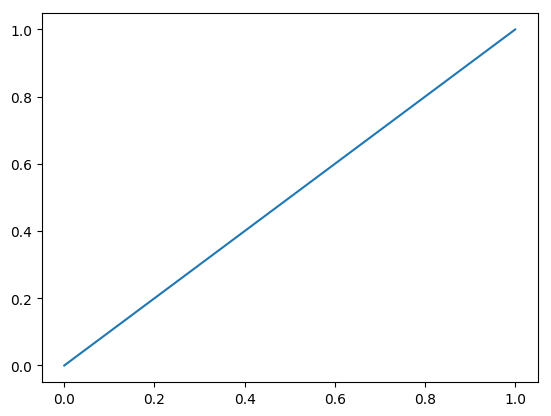

In [27]:
from sklearn import metrics
fpr,tpr, thresh= metrics.roc_curve(labels_test[:], labels_final_pred[:])

plt.plot(fpr,tpr)
print(metrics.roc_auc_score(labels_test[:],labels_final_pred[:]))

In [28]:
fpr, tpr

(array([0., 1.]), array([0., 1.]))

In [30]:
#Classification Report:
from sklearn.metrics import classification_report
y_true = labels_test
y_pred = labels_final_pred
target_names = ['Normal', 'Abnormal']
print(classification_report(y_true, y_pred, target_names))

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:468: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


ValueError: ignored

In [0]:
from sklearn.metrics import cohen_kappa_score
#This measure is intended to compare labelings by different human annotators, not a classifier versus a ground truth.

In [0]:
#Confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[238,  47],
       [120, 158]])

In [0]:
#counts of true negatives, false positives, false negatives and true positives
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(238, 47, 120, 158)